In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Quintile Proportion

In [2]:
df = pd.read_csv('proportions.csv', index_col = 0, parse_dates=['filingDate', 'reportDate'])
df = df[df.reportDate >= '2016-01-01']
df.head()

,reportDate,filingDate,cik,ExcessReturnsEqualWeightedSnP,ExcessReturnsValueWeightedSnP,propLM,propHar,weightedLM,weightedHar
24,2017-03-31,2017-05-10,814453,0.001553,-0.002548,0.025452,0.075698,0.030192,0.030750
25,2017-06-30,2017-08-09,814453,-0.007448,-0.009342,0.027238,0.077897,0.030676,0.031600
26,2017-09-30,2017-11-08,814453,-0.093537,-0.090037,0.027027,0.078293,0.027404,0.032252
27,2017-12-31,2018-03-01,814453,0.029816,0.033612,0.030401,0.081169,0.027154,0.032678
28,2018-03-31,2018-05-10,814453,-0.035938,-0.035280,0.025790,0.082259,0.028063,0.028632


In [3]:
def dataPartition(df, colnameForBins, colnameForMedian):
    '''
    Given a column name, it partitions the dataframe into quantiles and get the median of each quintile
    '''
    newDf = df.copy()
    quantiles = [0, 0.2, 0.4, 0.6, 0.8, 1]
    
    newDf['bins'] = pd.qcut(newDf[colnameForBins], quantiles, labels=['1st', '2nd', '3rd', '4th', '5th'])
    return newDf.groupby('bins').median()[[colnameForMedian]].reset_index()

In [4]:
newDf = df.copy()
quantiles = [0, 0.2, 0.4, 0.6, 0.8, 1]

In [5]:
newDf['bins'] = pd.qcut(newDf['propLM'], quantiles, labels=['1st', '2nd', '3rd', '4th', '5th'])
newDf[['propLM', 'bins']]

,propLM,bins
24,0.025452,2nd
25,0.027238,3rd
26,0.027027,3rd
27,0.030401,3rd
28,0.025790,2nd
...,...,...
20726,0.020214,1st
20727,0.014241,1st
20728,0.035195,4th
20729,0.023269,2nd


In [6]:
propLM = dataPartition(df, 'propLM', 'ExcessReturnsValueWeightedSnP')
propHar = dataPartition(df, 'propHar', 'ExcessReturnsValueWeightedSnP')
wPropLM = dataPartition(df, 'weightedLM', 'ExcessReturnsValueWeightedSnP')
wPropHar = dataPartition(df, 'weightedHar', 'ExcessReturnsValueWeightedSnP')
toPlot = {'Fin-Neg prop': propLM, 'H4N-Inf prop': propHar, 'tf.idf Fin-Neg prop': wPropLM, 'tf.idf H4N-Inf prop':wPropHar}


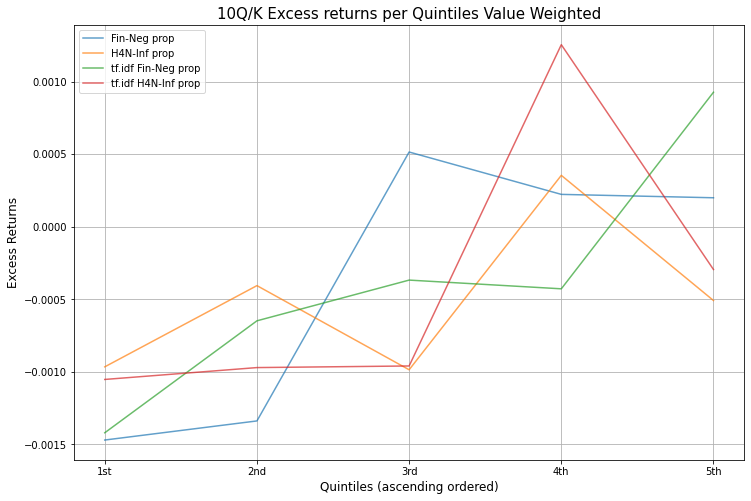

In [7]:
fig, ax = plt.subplots(1, figsize = (12, 8))
for key, value in toPlot.items():
    ax.plot(list(value.iloc[:, 0]), list(value.iloc[:, 1]), label = key, alpha = .7)
    
ax.set_xlabel('Quintiles (ascending ordered)', fontsize=12)
ax.set_ylabel('Excess Returns', fontsize=12)
ax.set_title('10Q/K Excess returns per Quintiles Value Weighted', fontsize=15)
ax.legend()
ax.grid()



# Computing Proportion of Negative Words for a sample stock Amazon

In [8]:
amazon = df[df['cik']== 1018724].reset_index()

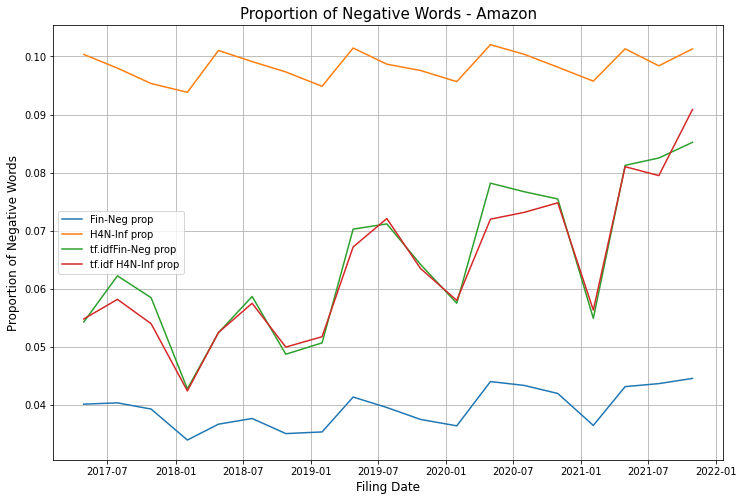

In [9]:
fig, ax = plt.subplots(1, figsize = (12, 8))

ax.plot(np.array(amazon['filingDate']), np.array(amazon['propLM']), label='Fin-Neg prop')
ax.plot(np.array(amazon['filingDate']), np.array(amazon['propHar']), label='H4N-Inf prop')
ax.plot(np.array(amazon['filingDate']), np.array(amazon['weightedLM']), label='tf.idfFin-Neg prop')
ax.plot(np.array(amazon['filingDate']), np.array(amazon['weightedHar']), label='tf.idf H4N-Inf prop')
ax.set_xlabel('Filing Date', fontsize=12)
ax.set_ylabel('Proportion of Negative Words', fontsize=12)
ax.set_title('Proportion of Negative Words - Amazon', fontsize=15)
ax.legend()
ax.grid()